# Construindo uma Rede Neural Simples

Bem-vindo ao primeiro laboratório! Neste notebook, você vai construir e treinar sua primeira rede neural — um único neurônio — para aprender padrões nos dados e fazer previsões.

Cenário: você é entregador de bicicleta com um pedido de 7 milhas. Sua empresa promete entrega em menos de 30 minutos. Uma entrega atrasada pode colocar seu emprego em risco. **Você consegue fazer essa entrega a tempo?** Vamos usar um modelo simples para aprender com dados históricos e ajudar na decisão.

Este notebook está totalmente documentado em português e organizado por etapas do pipeline de Machine Learning, com objetivos, checklist de execução, explicações passo a passo e reflexões para consolidar o aprendizado.

## Pipeline de Machine Learning (ML) em Ação

Aplicaremos etapas essenciais do pipeline de ML para resolver o problema de previsão de tempo de entrega:
- Preparar os dados de entregas: distâncias e tempos passados.
- Construir um modelo linear simples com PyTorch (apenas um neurônio).
- Treinar o modelo para aprender a relação entre distância e tempo.
- Prever se uma entrega de 7 milhas pode ser feita em até 30 minutos.

## Sumário
- Objetivos de Aprendizagem
- Checklist de Execução
- Etapas 1 e 2: Ingestão e Preparação dos Dados
- Etapa 3: Construção do Modelo
- Etapa 4: Treinamento
- Visualização: Dados vs. Linha Aprendida
- Predição: Entrega de 7 milhas
- Comparação: Linear vs. Não Linear
- Análise de Perda (Loss)
- Inspeção de Parâmetros (W e B)
- Reflexão e Erros Comuns
- Referências Úteis

## Objetivos de Aprendizagem
- Entender e aplicar as etapas essenciais do pipeline de ML.
- Construir um modelo linear com `nn.Linear` para regressão simples.
- Treinar o modelo com `SGD` e medir o erro com `MSELoss`.
- Visualizar resultados e interpretar a linha aprendida.
- Prever novos valores e avaliar limitações do modelo.

## Checklist de Execução
- [ ] Executar a célula de imports e configuração.
- [ ] Definir `distances` e `times`.
- [ ] Criar `model`, `loss_function` e `optimizer`.
- [ ] Treinar por `num_epochs` e acompanhar `loss`.
- [ ] Visualizar dados vs. linha aprendida.
- [ ] Prever tempo para 7 milhas.
- [ ] Comparar com dados não lineares (ilustração).
- [ ] Plotar histórico de perda.
- [ ] Inspecionar `W` e `B`.
- [ ] Ler reflexões e referências.

In [1]:
# Imports essenciais e configuração
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Reprodutibilidade (semente fixa)
torch.manual_seed(42)

# Estilo básico para gráficos
plt.style.use('default')

### Etapas 1 e 2: Ingestão e Preparação dos Dados

Definimos dois `tensors` PyTorch essenciais para o nosso problema:
- `distances`: distância percorrida em milhas para quatro entregas recentes.
- `times`: tempo, em minutos, gasto em cada uma dessas entregas.

Usamos `dtype=torch.float32` para garantir cálculos numéricos estáveis e precisos.

In [2]:
# Dados de exemplo (milhas e minutos)
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

print('Distâncias (mi):', distances.view(-1).tolist())
print('Tempos (min):   ', times.view(-1).tolist())

Distâncias (mi): [1.0, 2.0, 3.0, 4.0]
Tempos (min):    [6.960000038146973, 12.109999656677246, 16.770000457763672, 22.209999084472656]


Explicação do que está sendo feito:
- Criamos dois `tensors` que representam pares entrada–alvo (distância → tempo).
- Esses dados serão usados para ajustar os parâmetros do modelo durante o treinamento.
- Em cenários reais, você faria limpeza, tratamento de outliers e divisão em treino/validação/teste.

### Etapa 3: Construção do Modelo

Assumimos uma relação linear entre distância e tempo. Um único neurônio com uma entrada (a distância) representa a equação:

`Tempo = W × Distância + B`

Nosso objetivo é aprender os melhores valores de `W` (peso) e `B` (viés). Vamos usar `nn.Sequential(nn.Linear(1, 1))`, que gerencia automaticamente esses parâmetros.

In [3]:
# Modelo linear, função de perda e otimizador
model = nn.Sequential(nn.Linear(1, 1))
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Explicação do que está sendo feito:
- `nn.Linear(1, 1)` cria um neurônio com um peso (`W`) e um viés (`B`).
- `MSELoss` mede o erro quadrático médio entre previsão e alvo.
- `SGD` atualiza `W` e `B` com base nos gradientes, na taxa de aprendizado (`lr`).

Referências:
- Tensors: https://pytorch.org/docs/stable/tensors.html
- nn.Sequential: https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
- nn.Linear: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### Etapa 4: Treinamento

O treinamento ajusta `W` e `B` para minimizar o erro (MSE) entre as previsões do modelo e os tempos reais observados.

A cada época (iteração):
- Calculamos as previsões do modelo.
- Medimos a perda com `MSELoss`.
- Fazemos `backward()` para calcular gradientes.
- Chamamos `optimizer.step()` para atualizar os parâmetros.

In [4]:
# Laço de treinamento com registro da perda
num_epochs = 500
loss_history = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(distances)
    loss = loss_function(outputs, times)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f'Época {epoch + 1}: Loss = {loss.item():.6f}')

Época 50: Loss = 0.039449
Época 100: Loss = 0.035812
Época 150: Loss = 0.033119
Época 200: Loss = 0.031124
Época 250: Loss = 0.029646
Época 300: Loss = 0.028550
Época 350: Loss = 0.027739
Época 400: Loss = 0.027137
Época 450: Loss = 0.026692
Época 500: Loss = 0.026361


O que está acontecendo nesta célula:
- Zeramos gradientes antigos (`optimizer.zero_grad`).
- Fazemos previsão com o estado atual do modelo.
- Calculamos a perda (`loss_function`).
- `loss.backward()` computa gradientes de `W` e `B`.
- `optimizer.step()` aplica a atualização dos parâmetros.
- Registramos `loss_history` para analisar a convergência.

### Visualização: Dados Reais vs. Linha Aprendida

Vamos visualizar os pontos reais (distância vs. tempo) e a linha aprendida pelo modelo.

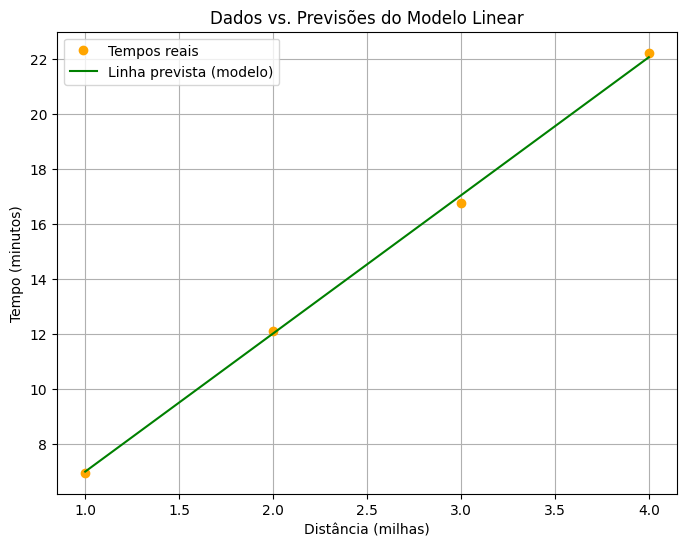

In [5]:
def plot_results(model, distances, times):
    """
    Plota os dados reais e a linha prevista pelo modelo.

    Args:
        model: Modelo treinado (PyTorch).
        distances: Tensor com as distâncias (entrada).
        times: Tensor com os tempos reais (alvo).
    """
    model.eval()
    with torch.no_grad():
        predicted_times = model(distances)

    plt.figure(figsize=(8, 6))
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Tempos reais')
    plt.plot(distances.numpy(), predicted_times.numpy(), color='green', label='Linha prevista (modelo)')
    plt.title('Dados vs. Previsões do Modelo Linear')
    plt.xlabel('Distância (milhas)')
    plt.ylabel('Tempo (minutos)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(model, distances, times)

Interpretação:
- Os pontos laranja são medições reais.
- A linha verde é a função linear aprendida pelo neurônio.
- Boa sobreposição indica que o modelo capturou a tendência geral.

### Predição: Entrega de 7 Milhas

Agora usamos o modelo para prever o tempo de uma entrega de **7 milhas** e verificamos se é menor ou igual a 30 minutos.

In [6]:
distance_to_predict = 7.0
with torch.no_grad():
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    predicted_time = model(new_distance).item()

print(f'Previsão para {distance_to_predict:.1f} milhas: {predicted_time:.2f} minutos')
if predicted_time > 30:
    print('A previsão indica atraso — talvez não seja seguro aceitar.')
else:
    print('Boa! A previsão indica que dá para entregar a tempo.')

Previsão para 7.0 milhas: 37.09 minutos
A previsão indica atraso — talvez não seja seguro aceitar.


Nota:
- Use diferentes valores (ex.: 5, 8, 10) para observar como o modelo responde.
- A decisão final deve considerar fatores reais (trânsito, clima, rota).

### Comparação: Modelo Linear vs. Realidade Não Linear

Na prática, o tempo pode não crescer de forma perfeitamente linear com a distância (ex.: trechos com semáforos, subidas, trânsito). Vamos comparar as previsões do nosso modelo com um conjunto sintético de dados não lineares.

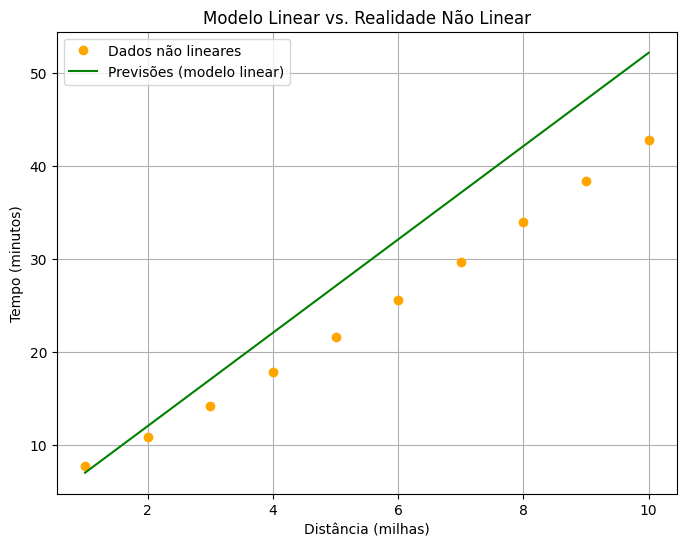

In [7]:
def plot_nonlinear_comparison(model, new_distances, new_times):
    """
    Compara as previsões do modelo linear com dados não lineares.

    Args:
        model: Modelo linear treinado.
        new_distances: Tensor com novas distâncias.
        new_times: Tensor com tempos não lineares (alvos).
    """
    model.eval()
    with torch.no_grad():
        predictions = model(new_distances)

    plt.figure(figsize=(8, 6))
    plt.plot(new_distances.numpy(), new_times.numpy(), color='orange', marker='o', linestyle='None', label='Dados não lineares')
    plt.plot(new_distances.numpy(), predictions.numpy(), color='green', label='Previsões (modelo linear)')
    plt.title('Modelo Linear vs. Realidade Não Linear')
    plt.xlabel('Distância (milhas)')
    plt.ylabel('Tempo (minutos)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dados não lineares sintéticos (apenas para ilustração)
new_distances = torch.linspace(1, 10, steps=10).unsqueeze(1)
nonlinear_times = 5 + 2.2 * new_distances + 0.5 * (new_distances ** 1.5)
plot_nonlinear_comparison(model, new_distances, nonlinear_times)

Interpretação:
- Se os pontos não lineares se afastarem da linha verde, o modelo linear não captura bem a complexidade.
- Isso sugere tentar features adicionais ou modelos mais expressivos (ex.: redes com múltiplas camadas).

### Análise de Perda (Loss)

Vamos visualizar a evolução da perda durante o treinamento para verificar a convergência.

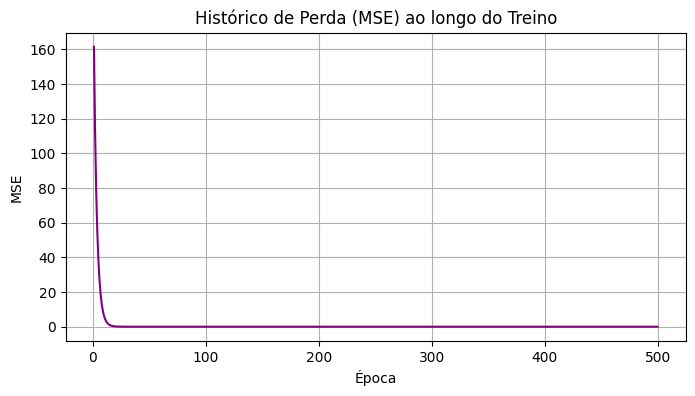

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), loss_history, color='purple')
plt.title('Histórico de Perda (MSE) ao longo do Treino')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Interpretação:
- Perda decrescente indica que o modelo está aprendendo a ajustar `W` e `B`.
- Se a curva oscila demais, tente reduzir `lr`. Se ficar plana, aumente `lr` ou epochs.

### Inspeção de Parâmetros (W e B)

Vamos observar os parâmetros aprendidos pelo neurônio linear.

In [9]:
with torch.no_grad():
    W = model[0].weight.detach().item()
    B = model[0].bias.detach().item()
print(f'Peso (W): {W:.4f}')
print(f'Viés (B): {B:.4f}')

Peso (W): 5.0155
Viés (B): 1.9850


## Conclusões e Próximos Passos

- Um neurônio (modelo linear) pode capturar relações simples e fornecer previsões rápidas.
- Se os dados tiverem padrões mais complexos, considere modelos com mais camadas (redes neurais profundas) ou features adicionais.
- Experimente ajustar a taxa de aprendizado (`lr`), número de épocas (`num_epochs`) e diferentes funções de perda.
- Avalie seu modelo com dados de validação, e pense em métricas como MAE/MSE e intervalos de confiança para decisões mais robustas.

## Reflexão
- Em que situações uma relação linear é suficiente?
- O que mudaria se os dados incluíssem variações de tráfego ou clima?
- Como você validaria este modelo antes de usá-lo para decisões reais?

## Erros Comuns
- Esquecer de `optimizer.zero_grad()`, acumulando gradientes errados.
- Misturar `dtype` (ex.: usar `int` ao invés de `float32` para regressão).
- Ler a perda isoladamente sem visualizar dados e previsões.
- Assumir linearidade quando há clara não linearidade (ex.: rotas complexas).

## Referências Úteis
- PyTorch Tensors: https://pytorch.org/docs/stable/tensors.html
- nn.Sequential: https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
- nn.Linear: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
- Otimizadores (SGD): https://pytorch.org/docs/stable/optim.html
- Perdas (MSELoss): https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html